<a href="https://colab.research.google.com/github/yashs79/financialaranomaly/blob/main/02_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **2. Pre-processing - Dataset Splitting and Scaling**

#### Importing libraries

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")

# pre-processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# over-sampling
from imblearn.over_sampling import SMOTE

np.random.seed(23)

In [4]:
raw_data = pd.read_csv('/content/creditcard.csv')

##### **2.1 Stratified Random Sampling**

- Splitting the dataset into Train and Test sets while **preserving the original class ratio**

In [5]:
df = raw_data.copy()

X, y =  raw_data.iloc[:,:-1], raw_data.iloc[:,-1]
print(f'X:{X.shape}, y:{y.shape}')

X_train_strat, X_test_strat, y_train_strat, y_test_strat = train_test_split(X,y,test_size=0.30, random_state = 23, stratify = y)
print(f'X_train_start:{X_train_strat.shape}, X_test_strat:{X_test_strat.shape}, y_train_strat:{y_train_strat.shape}, y_test_strat:{y_test_strat.shape}')

# Scaling `amount` and `time`
ct = ColumnTransformer([('somename', StandardScaler(), [0,-1])], remainder='passthrough')

X_train_strat = ct.fit_transform(X_train_strat)
X_test_strat = ct.transform(X_test_strat)

# Label Distribution
train_labels, train_label_counts = np.unique(y_train_strat, return_counts=True)
test_labels, test_label_counts = np.unique(y_test_strat, return_counts=True)

print('\nLabel Distributions:')
print(f'lables: {train_labels}')
print(f'Train set --> label counts: {train_label_counts} label percentages: {train_label_counts/ len(y_train_strat)}')
print(f'Test set  --> label counts: {test_label_counts}   label percentages: {test_label_counts/ len(y_test_strat)}')

# Saving as csv files
X_train_strat = pd.DataFrame(data=X_train_strat, columns=X.columns)
X_test_strat = pd.DataFrame(data=X_test_strat, columns=X.columns)
y_train_strat = pd.DataFrame(data=y_train_strat, columns=[y.name])
y_test_strat = pd.DataFrame(data=y_test_strat, columns=[y.name])

X_train_strat.to_csv('/content/X_train_strat.csv', sep=',', index=False)
X_test_strat.to_csv('/content/X_test_strat.csv', sep=',', index=False)
y_train_strat.to_csv('/content/y_train_strat.csv',sep=',', index = False)
y_test_strat.to_csv('/content/y_test_strat.csv', sep=',', index = False)

X:(284807, 30), y:(284807,)
X_train_start:(199364, 30), X_test_strat:(85443, 30), y_train_strat:(199364,), y_test_strat:(85443,)

Label Distributions:
lables: [0 1]
Train set --> label counts: [199020    344] label percentages: [0.99827451 0.00172549]
Test set  --> label counts: [85295   148]   label percentages: [0.99826785 0.00173215]


##### **2.2 Over sampling (default)**

- **Train set:** 50% of the records from Class of Interest or Success class (fraudlent transactions) and same # of records from the Alternate class (normal transactions) are randomly sampled to create the Train set.
- **Test set:** The remaining records from both the classes are combined to form the Test set.

In [ ]:
n_success_class = raw_data['Class'].value_counts()[1] # counting # of success class samples

data_success = raw_data[ raw_data['Class']==1]   # collecting all records belonging to class 1
data_alternate = raw_data[ raw_data['Class']==0] # collecting all records belonging to class 1

# resetting indices
data_success = data_success.reset_index(drop=True)
data_alternate = data_alternate.reset_index(drop=True)

# Collecting 50% of records of success class (class 1)
indices = np.random.randint(low=0, high = data_success.shape[0]-1, size=n_success_class//2)
data_success_50 = data_success.iloc[indices]
data_success_rest = data_success.iloc[~indices]

# Collecting 50% of records of alternate class (class 0)
indices = np.random.randint(low=0, high = data_alternate.shape[0]-1, size=n_success_class//2)
data_alternate_50 = data_alternate.iloc[indices]
rest_indices = list(set(np.arange(0, data_alternate.shape[0])) - set(indices))
data_alternate_rest = data_alternate.iloc[rest_indices]

train_data = pd.concat([data_success_50, data_alternate_50])
test_data = pd.concat([data_success_rest, data_alternate_rest])

X_train_os, y_train_os = train_data.iloc[:, :-1], train_data.iloc[:, -1]
X_test_os, y_test_os = test_data.iloc[:, :-1], test_data.iloc[:, -1]

# Scaling `amount` and `time`
ct = ColumnTransformer([('somename', StandardScaler(), [0,-1])], remainder='passthrough')
ct.fit(X_train_os)
X_train_os = ct.transform(X_train_os)
X_test_os = ct.transform(X_test_os)

# Label Distribution
train_labels, train_label_counts = np.unique(y_train_os, return_counts=True)
test_labels, test_label_counts = np.unique(y_test_os, return_counts=True)

print('\nLabel Distributions:')
print(f'lables: {train_labels}')
print(f'Train set --> label counts: {train_label_counts}       label percentages: {train_label_counts/ len(y_train_os)}')
print(f'Test set  --> label counts: {test_label_counts} label percentages: {test_label_counts/ len(y_test_os)}')

# Saving as csv files
X_train_os = pd.DataFrame(data=X_train_os, columns=X.columns)
X_test_os = pd.DataFrame(data=X_test_os, columns=X.columns)
y_train_os = pd.DataFrame(data=y_train_os, columns=[y.name])
y_test_os = pd.DataFrame(data=y_test_os, columns=[y.name])

X_train_os.to_csv('/content/X_train_os.csv', sep=',', index=False)
X_test_os.to_csv('/content/X_test_os.csv', sep=',', index=False)
y_train_os.to_csv('/content/y_train_os.csv',sep=',', index = False)
y_test_os.to_csv('/content/y_test_os.csv', sep=',', index = False)


Label Distributions:
lables: [0 1]
Train set --> label counts: [246 246]       label percentages: [0.5 0.5]
Test set  --> label counts: [284069    246] label percentages: [9.99134762e-01 8.65237501e-04]


### Correlation Heatmap

- Previous Heatmap was plotted on highly imbalanced classes.
- The following is the correlation heatmap with balanced classes.

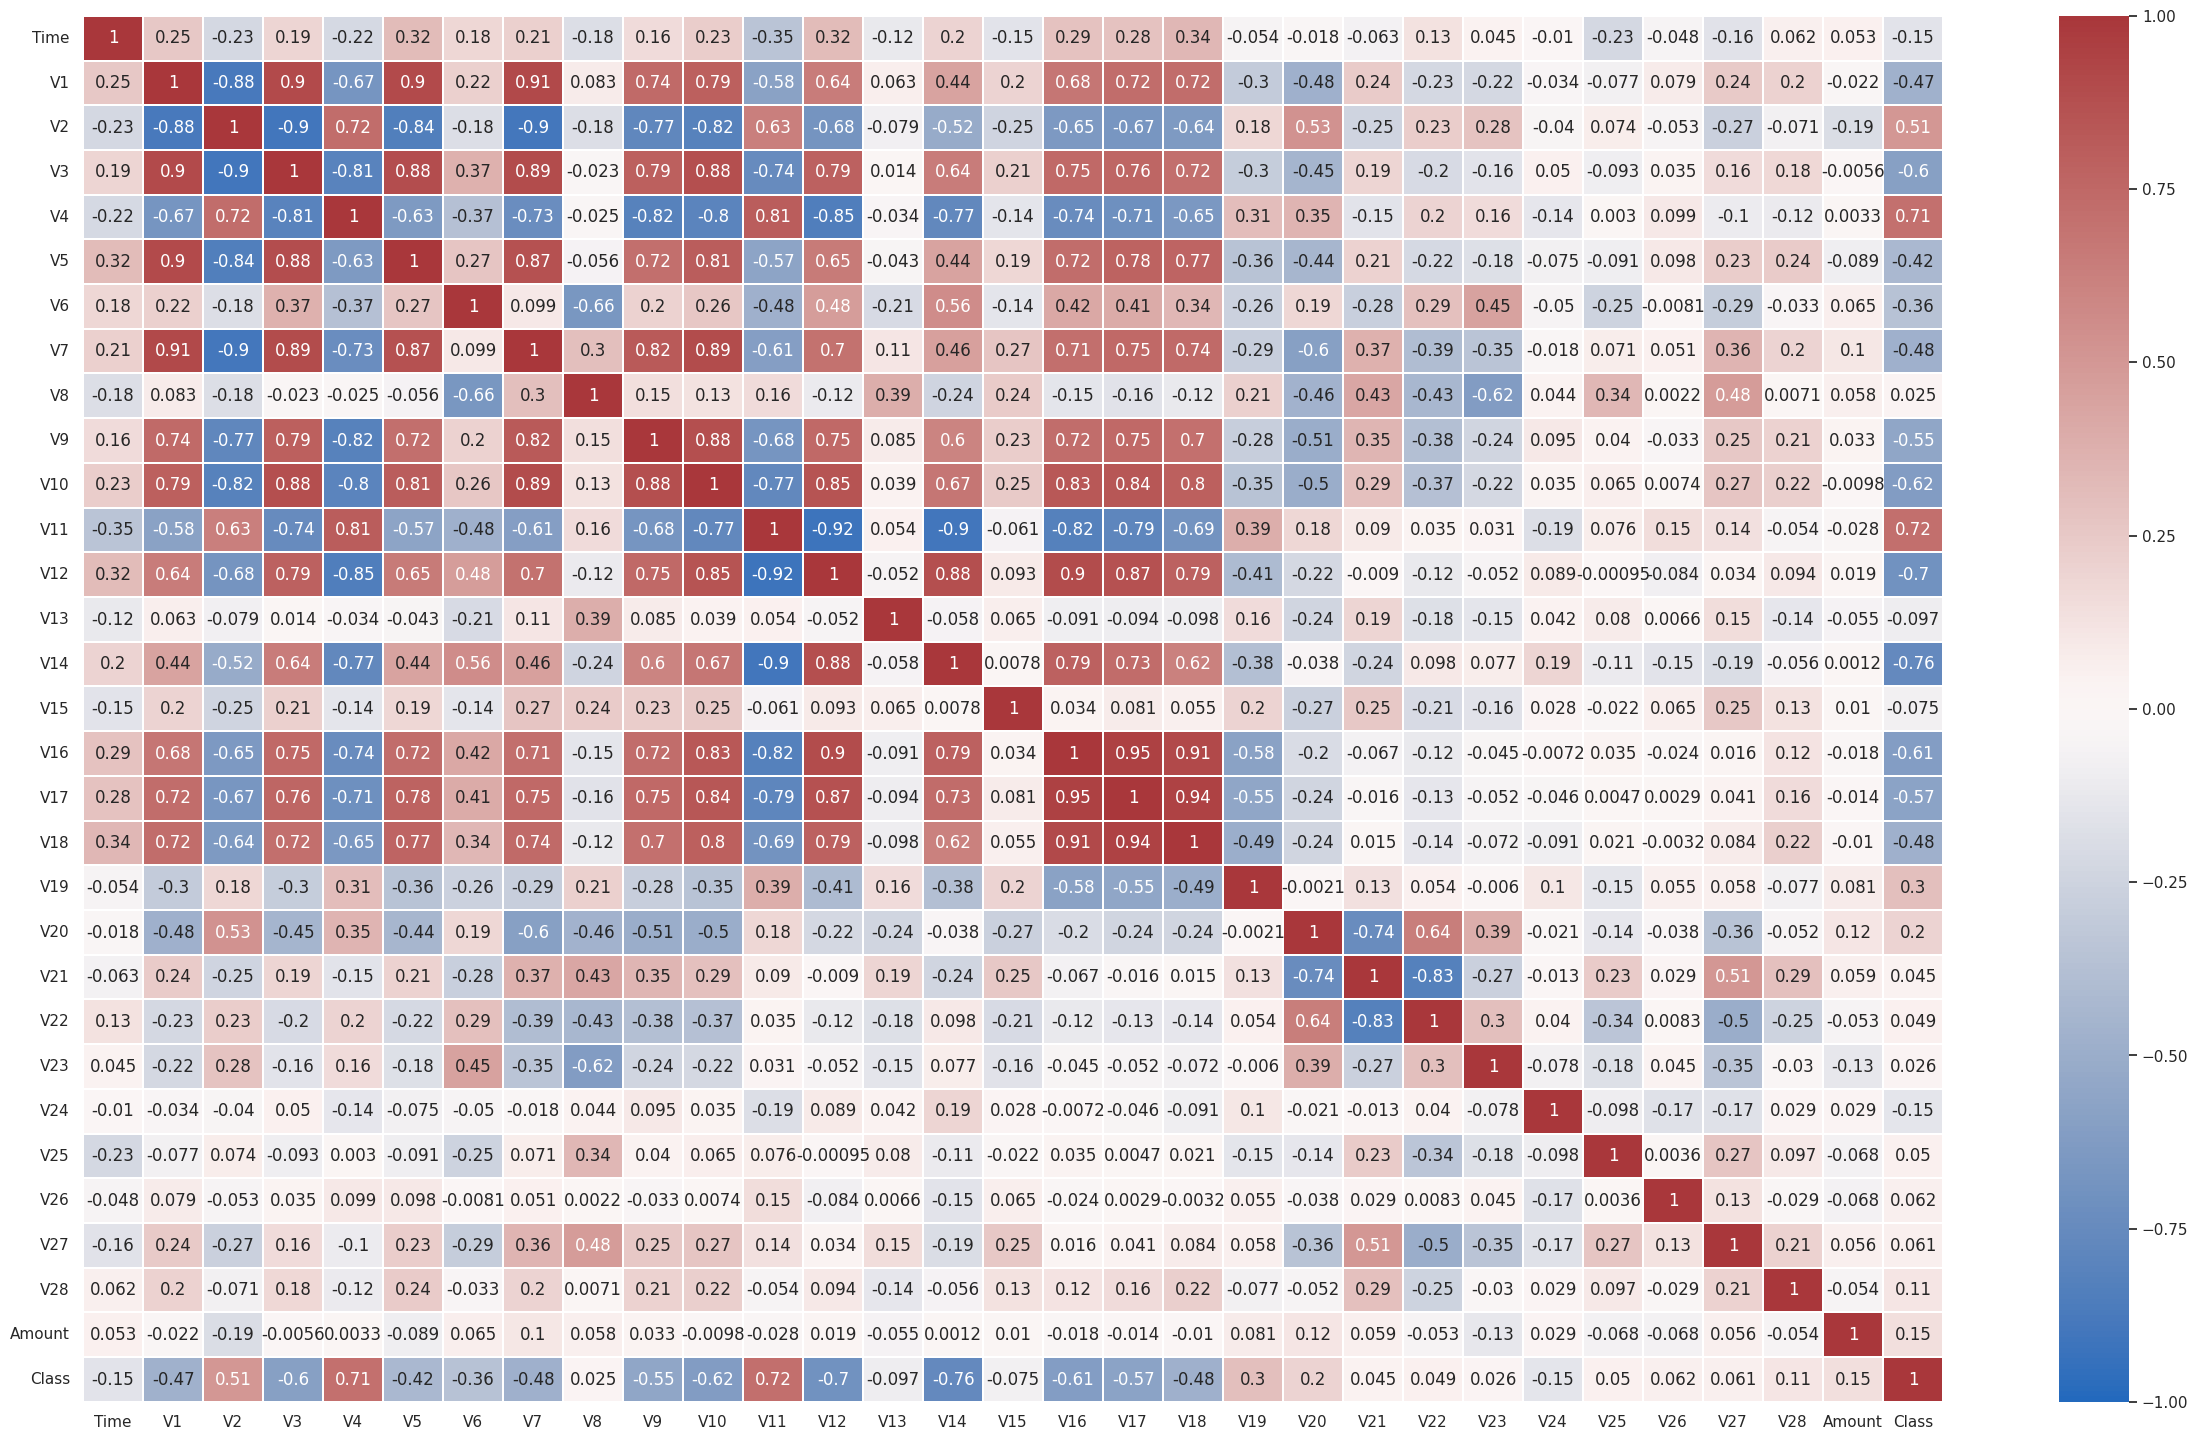

In [ ]:
plt.figure(figsize=(30, 18))
corr  = train_data.corr()
ax = sns.heatmap(corr,cmap='vlag', annot=True, vmax=1.0, vmin=-1.0, linewidths=0.1)

##### **2.3 Over Sampling using SMOTE(Synthetic Minority Oversampling TEchnique)**

- **SMOTE** synthesizes new data points from existing data points
- After over sampling, train set contains equal # of data points for both classes

In [ ]:
X, y =  raw_data.iloc[:,:-1], raw_data.iloc[:,-1]
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X,y,test_size=0.30, random_state = 23, stratify = y)
print(f'X_train_smote:{X_train_smote.shape}, X_test_smote:{X_test_smote.shape}, y_train_smote:{y_train_smote.shape}, y_test_smote:{y_test_smote.shape}')

print(f'\ntrain labels:\n{y_train_smote.value_counts()}')
# scaling `amount` and `time`
ct = ColumnTransformer([('somename', StandardScaler(), [0,-1])], remainder='passthrough')
ct.fit(X_train_smote)
X_train_smote = ct.transform(X_train_smote)
X_test_smote = ct.transform(X_test_smote)

smote = SMOTE(random_state=23)
X_train_smote, y_train_smote = smote.fit_resample(X_train_smote, y_train_smote)

train_labels, train_label_counts = np.unique(y_train_smote, return_counts=True)
test_labels, test_label_counts = np.unique(y_test_smote, return_counts=True)

print('\nLabel Distributions:')
print(f'lables: {train_labels}')
print(f'Train set --> label counts: {train_label_counts} label percentages: {train_label_counts/ len(y_train_smote)}')
print(f'Test set  --> label counts: {test_label_counts}   label percentages: {test_label_counts/ len(y_test_smote)}')

# Saving as csv files
X_train_smote = pd.DataFrame(data=X_train_smote, columns=X.columns)
X_test_smote = pd.DataFrame(data=X_test_smote, columns=X.columns)
y_train_smote = pd.DataFrame(data=y_train_smote, columns=[y.name])
y_test_smote = pd.DataFrame(data=y_test_smote, columns=[y.name])

X_train_smote.to_csv('/content/X_train_smote.csv', sep=',', index=False)
X_test_smote.to_csv('/content/X_test_smote.csv', sep=',', index=False)
y_train_smote.to_csv('/content/y_train_smote.csv',sep=',', index = False)
y_test_smote.to_csv('/content/y_test_smote.csv', sep=',', index = False)

X_train_smote:(199364, 30), X_test_smote:(85443, 30), y_train_smote:(199364,), y_test_smote:(85443,)

train labels:
Class
0    199020
1       344
Name: count, dtype: int64

Label Distributions:
lables: [0 1]
Train set --> label counts: [199020 199020] label percentages: [0.5 0.5]
Test set  --> label counts: [85295   148]   label percentages: [0.99826785 0.00173215]
